# PDX Tumors Plasticity

In [1]:
# import mazebox as mb
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import dropkick as dk
# make sure to use position 1
sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb
import cellrank as cr
import scanorama

In [2]:
X_magic = sc.read_h5ad('../../out/PDX-tumors/X_magic_02.h5ad')

In [3]:
adata = sc.read_h5ad('../../out/PDX-tumors/adata_04.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 928 × 10885
    obs: 'Clusters', '_X', '_Y', 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'tumor', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'M', 'E', 'clusters_gradients', 'cell_cycle_diff', 'specialists_pca_diffdist', 'SCLC-Y_Score', 'SCLC-P_Score', 'SCLC-N_Score', 'SCLC-A2_Score', 'SCLC-A_Score', 'Phenotype', 'SCLC-A_Score_pos', 'SCLC-A2_Score_pos', 'SCLC-N_Score_pos', 'SCLC-P_Score_pos', 'SCLC-Y_Score_pos', 'arc_pheno', 'arc_aa_type', 'n_counts', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mito', 'pct_

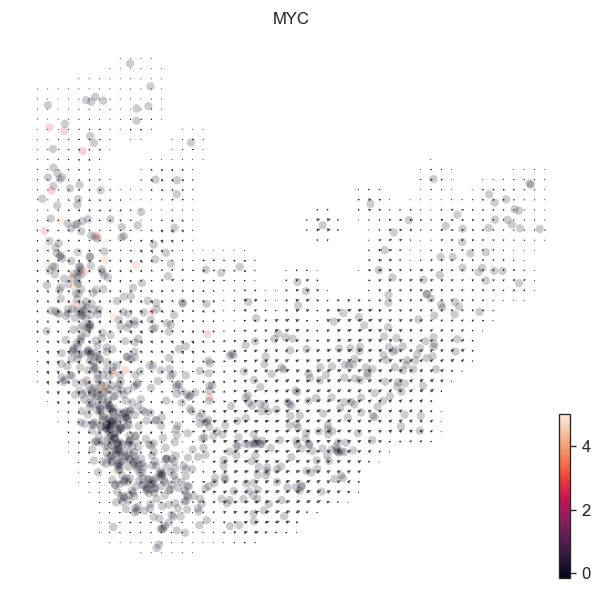

In [33]:
scv.pl.velocity_embedding_grid(adata,color = 'MYC', basis='pca_imputed', dpi=120,
                    zorder=1,figsize=(6,6), vmax = 5, size =100, smooth = True)

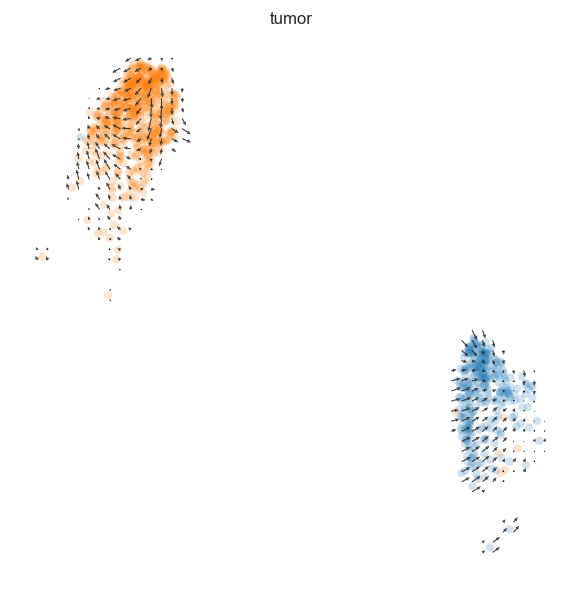

In [27]:
scv.pl.velocity_embedding_grid(adata,color = 'tumor', basis='umap', dpi=120,
                    zorder=1,figsize=(6,6), vmax = 5, size = 100)

# Deterministic velocity

In [6]:
scv.tl.velocity(adata, mode = 'deterministic', groupby='tumor', vkey = 'deterministic')


computing velocities
    finished (0:00:00) --> added 
    'deterministic', velocity vectors for each individual cell (adata.layers)


In [7]:
scv.tl.velocity_graph(adata, vkey='deterministic')

computing velocity graph (using 1/16 cores)


  0%|          | 0/928 [00:00<?, ?cells/s]

    finished (0:00:27) --> added 
    'deterministic_graph', sparse matrix with cosine correlations (adata.uns)


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


In [34]:
mb.ps.ctrp_simplified(adata, vkey = 'deterministic',distance_basis='X_pca')



(928, 928)
Eigenvalues:  [1.0000005]
    identified 1 end points
[[0.03402667 0.03773728 0.03192823 ... 0.0170824  0.03568826 0.03540086]
 [0.03090816 0.03580473 0.03034806 ... 0.02100101 0.03333568 0.03409093]
 [0.03145597 0.03711636 0.02665649 ... 0.0186649  0.03327032 0.03534447]
 ...
 [0.0289495  0.03386789 0.03095982 ... 0.02333838 0.03167843 0.03591412]
 [0.02955953 0.03642525 0.0240442  ... 0.01680952 0.03246729 0.03664941]
 [0.02985466 0.03630084 0.02958602 ... 0.02228631 0.03273255 0.03486104]]


<AxesSubplot:title={'center':'ctrp'}>

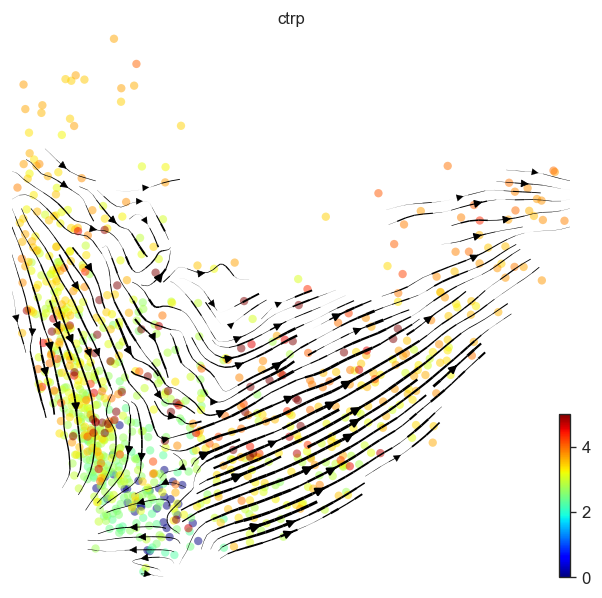

In [38]:
scv.pl.velocity_embedding_stream(adata, color='ctrp', show=False, color_map='jet', alpha=0.5, basis='pca_imputed', dpi=120,
                    zorder=1,figsize=(6,6), vmax = 5, size = 100)

<AxesSubplot:ylabel='ctrp'>

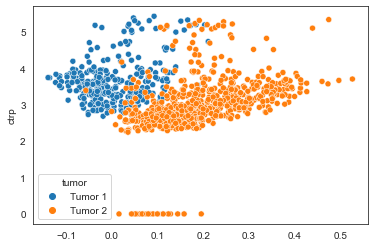

In [39]:
sns.scatterplot(x= X_magic.obs_vector("MYC"), y = adata.obs.ctrp, hue = adata.obs.tumor)

## CTrP

In [16]:
mb.ps.ctrp_simplified(adata,distance_basis='X_pca_imputed')



(928, 928)
Eigenvalues:  [1.0000019]
    identified 1 end points
[[0.08458925 0.04688306 0.03656522 ... 0.05946905 0.04644842 0.00841131]
 [0.08458708 0.04688568 0.03656705 ... 0.05946871 0.04644098 0.00841975]
 [0.08458807 0.04686531 0.03656903 ... 0.05947049 0.04644224 0.00840042]
 ...
 [0.07848589 0.05507831 0.03670336 ... 0.056125   0.04544416 0.01857443]
 [0.09521674 0.06383891 0.02922982 ... 0.04605893 0.03786624 0.00518426]
 [0.08323231 0.04614537 0.03666472 ... 0.06105463 0.04660031 0.01196913]]


In [38]:
mb.ps.ctrp_simplified(adata,distance_basis='X_pca_imputed', groupby='tumor')



(Tumor 1)
    identified 0 end points


Trying to set attribute `.obs` of view, copying.


[]
(Tumor 2)
Eigenvalues:  [0.9999999]
    identified 1 end points


Trying to set attribute `.obs` of view, copying.


[[0.03763306 0.03865188 0.04653699 ... 0.02193713 0.03155921 0.03787802]
 [0.0375435  0.0373726  0.03699203 ... 0.02704589 0.03602437 0.03666195]
 [0.03732965 0.03888839 0.03713035 ... 0.01738255 0.03439211 0.03795322]
 ...
 [0.03733869 0.03911696 0.03699471 ... 0.02581447 0.03498008 0.03942666]
 [0.03972331 0.04112269 0.04017127 ... 0.01916164 0.0356041  0.03998605]
 [0.03956299 0.03908334 0.03937125 ... 0.02528363 0.03551254 0.03822834]]


<AxesSubplot:ylabel='ctrp'>

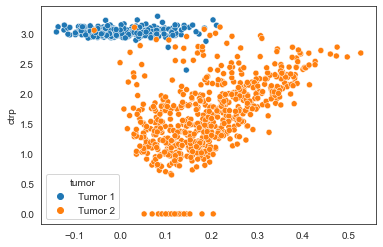

In [17]:
sns.scatterplot(x= X_magic.obs_vector("MYC"), y = adata.obs.ctrp, hue = adata.obs.tumor)

In [35]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
cp = ['#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3']
color_dict = {'SCLC-Y': cp[4], 'SCLC-A': cp[0], 'SCLC-A2': cp[1], 'SCLC-N': cp[2], 'SCLC-P': cp[3],
              'Generalist': 'darkgray', 'None': 'lightgrey'}
color_dict = {'True':'black','False':'lightgrey'}



In [36]:
cp = ['#a9a9a9','#d3d3d3','#fc8d62', '#66c2a5', '#FFD43B', '#8da0cb', '#e78ac3'] #for use with generalists, etc.

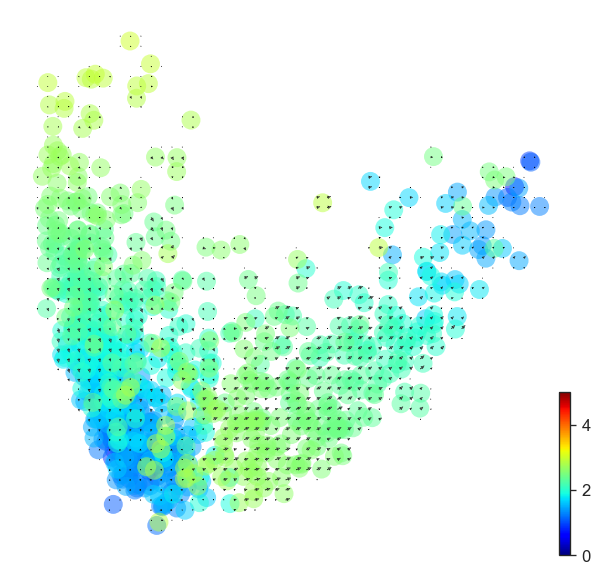

In [37]:
_adata = adata[adata.obs['absorbing'] == 'True',]
ax = scv.pl.velocity_embedding_grid(adata, color='ctrp', show=False, color_map='jet', alpha=0.5, basis='pca_imputed', dpi=120,
                    zorder=1,figsize=(6,6), vmax = 5)
scv.pl.scatter(_adata, color='black', size=30, ax=ax, zorder=2, alpha=1, basis='umap')

<AxesSubplot:ylabel='ctrp'>

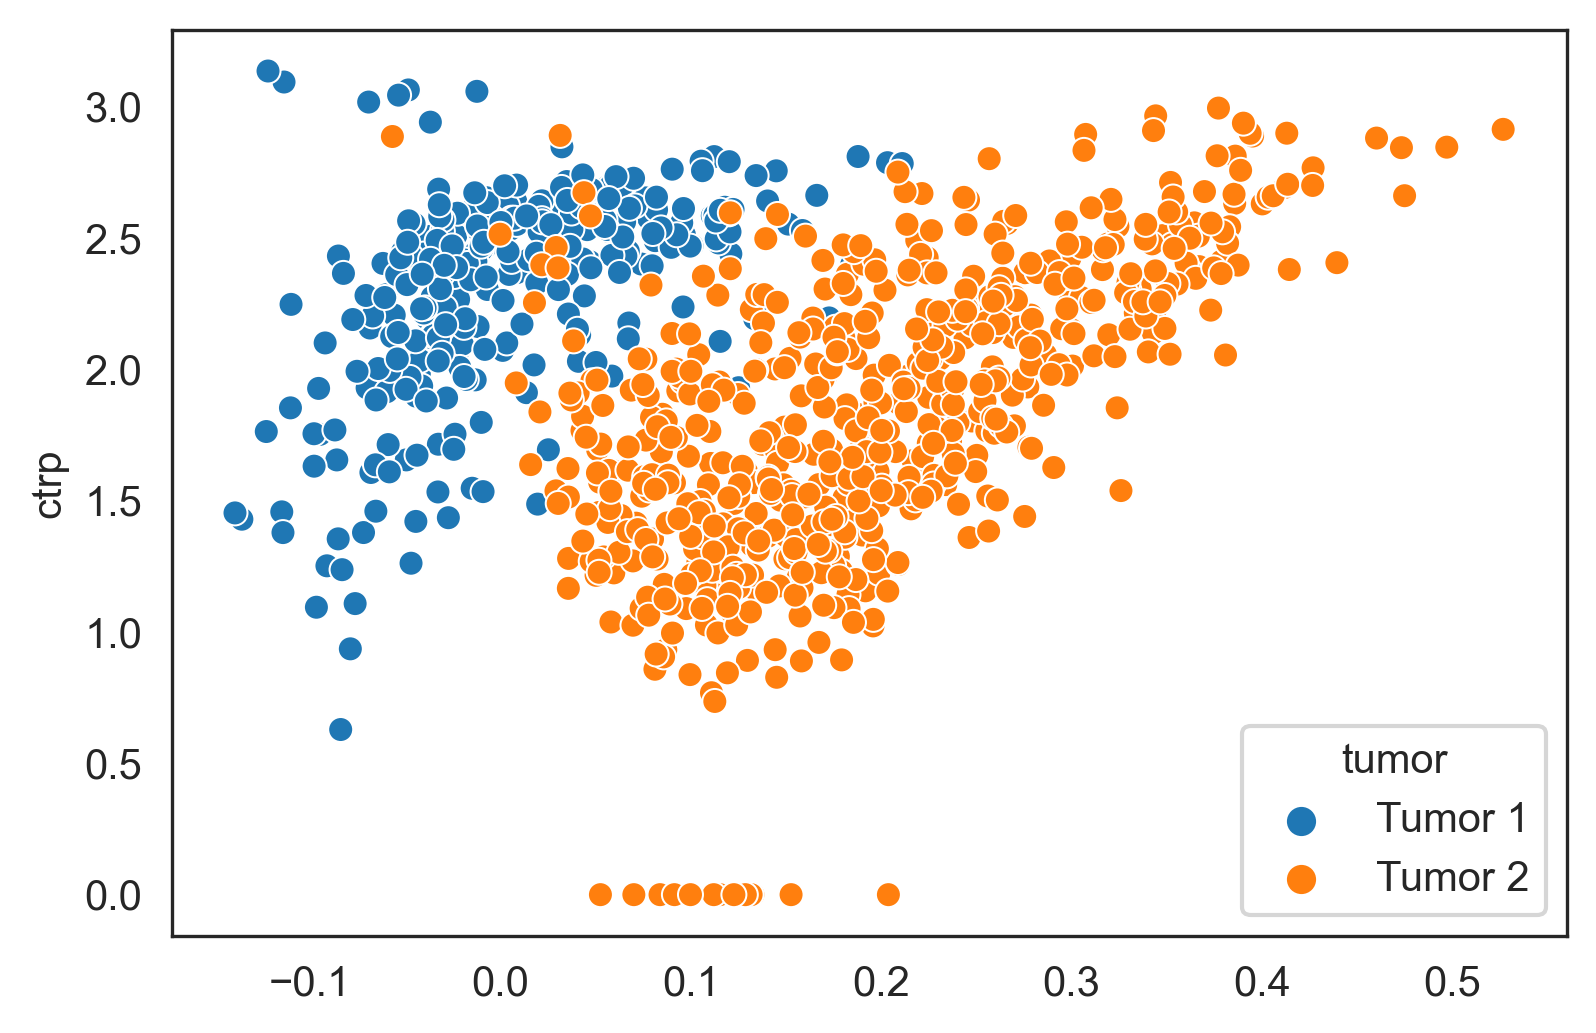

In [22]:
sns.scatterplot(x= X_magic.obs_vector("MYC"), y = adata.obs.ctrp, hue = adata.obs.tumor)

In [ ]:
sns.scatterplot(x= X_magic.obs_vector("MYC"), y = adata.obs.ctrp, hue = adata.obs.tumor)

<AxesSubplot:xlabel='ctrp', ylabel='Density'>

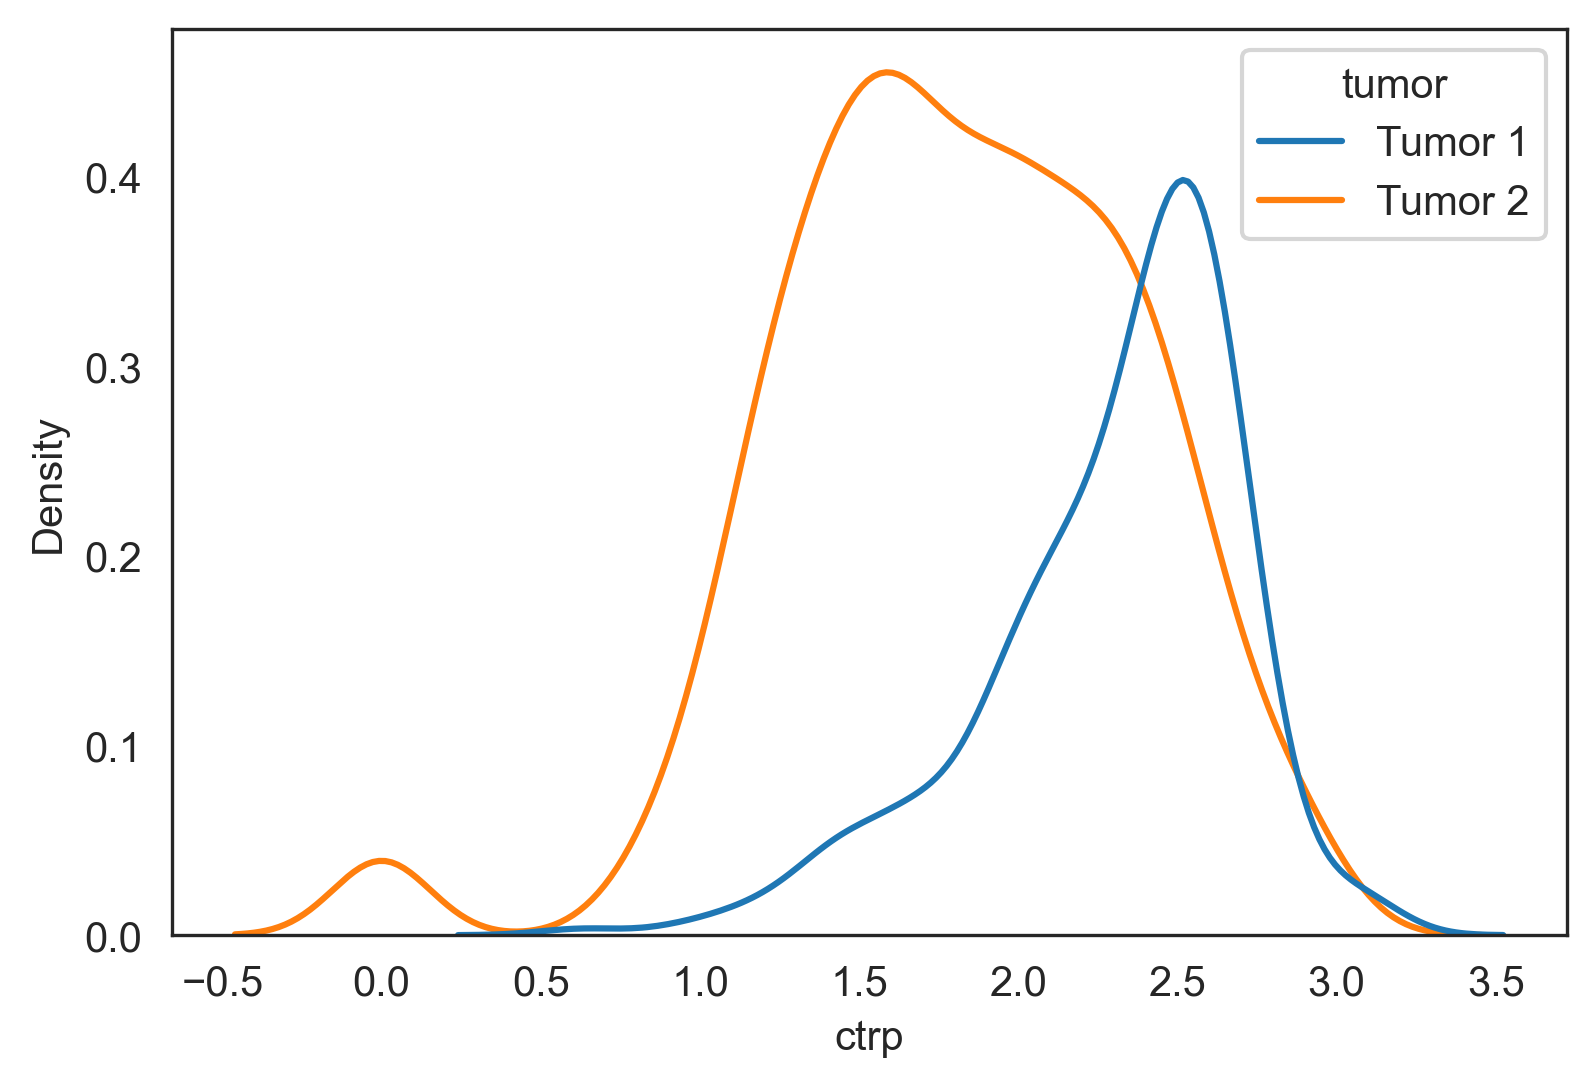

In [24]:
sns.kdeplot(x = adata.obs.ctrp, hue = adata.obs.tumor)